In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List

from fragment import *
from side import *
from sides_comparison import *

In [2]:
import os
import cv2 as cv
import numpy as np

def divide_image(image_path, output_folder, n, m):
    os.makedirs(output_folder, exist_ok=True)
    
    image = cv.imread(image_path, cv.COLOR_BGR2RGB)
    h, w = image.shape[:2] 

    tile_h, tile_w = h // n, w // m  

    fragments = []

    for i in range(n):
        for j in range(m):
            x, y = j * tile_w, i * tile_h  
            cropped_piece = image[y:y + tile_h, x:x + tile_w]  
            
            piece_path = os.path.join(output_folder, f"fragment_{i*m+j}.jpg")
            cv.imwrite(piece_path, cropped_piece)
            fragment = Fragment(cropped_piece, i*m + j)
            fragments.append(fragment)

    return fragments  

image_path = "angry.jpg" 
output_folder = "fragments"
n, m = 2,2
pieces = divide_image(image_path, output_folder, n, m)



In [3]:
def create_sides(fragments:List[Fragment]):
    sides = []
    for fragment in fragments:
        reverse_top = np.squeeze(fragment.value[0:1, :, :])
        sides.append(Side(reverse_top[::-1],"top",fragment.fragment_idx)) 
        sides.append(Side(np.squeeze(fragment.value[-1:, :, :]),"bottom", fragment.fragment_idx))
        sides.append(Side(np.squeeze(fragment.value[:, 0:1, :]),"left", fragment.fragment_idx))
        reverse_right = np.squeeze(fragment.value[:, -1:, :])
        sides.append(Side(reverse_right[::-1],"right", fragment.fragment_idx))


    # for side in sides:
    #     plt.imshow(side.value)
    #     plt.title(f" {side.side_type}")
    #     plt.axis("off")
    #     plt.show()

    return sides

sides = create_sides(pieces)

score: 1.3966079590344984
distances: [[  1   0   3]
 [  1   0   2]
 [  1   0   3]
 [  1   0   2]
 [  1   0   3]
 [  1   0   2]
 [  1   0   3]
 [  1   0   2]
 [  1   0   3]
 [  1   0   2]
 [  1   0   3]
 [  0  -1   1]
 [  0  -1   2]
 [  0  -1   1]
 [ -1  -2   1]
 [ -1  -2   0]
 [  3   2   5]
 [  2   1   3]
 [  2   1   4]
 [  1   0   2]
 [  1   0   3]
 [  0  -1   1]
 [  0  -1   2]
 [ -2  -3   0]
 [  1   1   1]
 [  1   0   2]
 [  0  -1   1]
 [  0  -1   1]
 [  1   0   2]
 [  1   0   2]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0  -1   1]
 [  0   0   0]
 [  2   0   5]
 [ -1  -2   2]
 [ -4  -6  -1]
 [ -4  -5  -1]
 [ -1  -2   2]
 [  4   3   7]
 [  8   6  10]
 [ 10   9  13]
 [ 

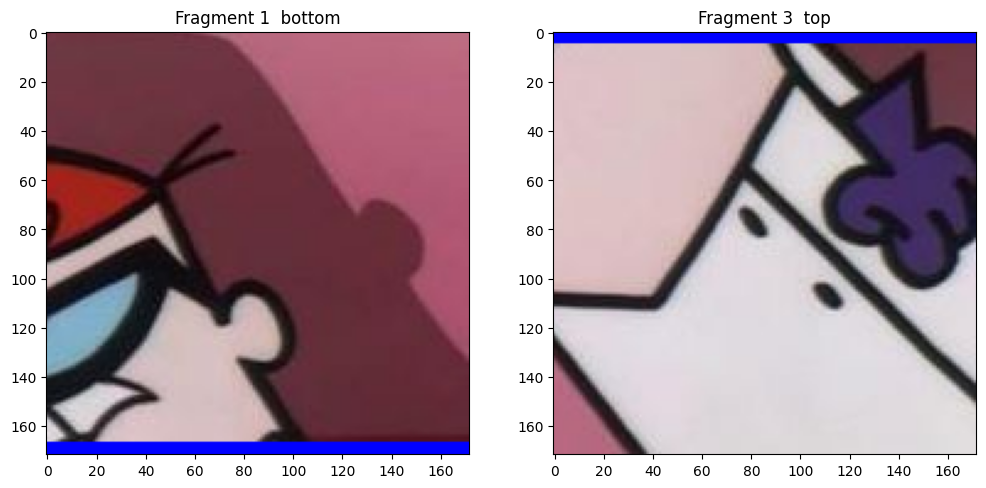

AttributeError: 'SidesComparison' object has no attribute 'reversed_side2_value'

In [ ]:
def draw_red_border(fragment:Fragment, side: Side, thickness=5):
    fragment_value = fragment.value.copy()
    if side.side_type == "top": 
        fragment_value[0:thickness, :] = [255, 0, 0] 
    elif side.side_type == "bottom":  
        fragment_value[-thickness:, :] = [255, 0, 0]  
    elif side.side_type == "left":  
        fragment_value[:, 0:thickness] = [255, 0, 0]  
    elif side.side_type == "right": 
        fragment_value[:, -thickness:] = [255, 0, 0]  
    return fragment_value


def find_similar_colored_edges(sides: List[Side], fragments: List[Fragment]):
    sides_comparisons = []
    for i in range(len(sides)-1):
        side1 = sides[i]
        for j in range(i+1, len(sides)):
            side2 = sides[j]
            if side1.fragment_idx != side2.fragment_idx:
                sides_comparisons.append(SidesComparison(side1, side2))

    sorted_sides_comparisons = sorted(sides_comparisons, key=lambda x: x.score)
    for comp in sorted_sides_comparisons:
        print(f"score: {comp.score}")
        print(f"distances: {comp.points_distances}")
        fragment1 = draw_red_border(fragments[comp.side1.fragment_idx], comp.side1)  
        fragment2 = draw_red_border(fragments[comp.side2.fragment_idx], comp.side2)  

        plt.figure(figsize=(12, 6)) 

        plt.subplot(1, 2, 1)  
        plt.imshow(fragment1[..., ::-1]) 
        plt.title(f"Fragment {comp.side1.fragment_idx}  {comp.side1.side_type}")

        plt.subplot(1, 2, 2)  
        plt.imshow(fragment2[..., ::-1])
        plt.title(f"Fragment {comp.side2.fragment_idx}  {comp.side2.side_type}")

        plt.show()
        
        side1_printable_values = comp.reversed_side1_value[np.newaxis, :, :]
        side2_printable_values = comp.side2.value[np.newaxis, :, :]
        plt.figure(figsize=(6, 1))
        
        plt.subplot(2, 1, 1)
        plt.imshow(side1_printable_values[..., ::-1])
        plt.title(f" {comp.side1.side_type} of Fragment {comp.side1.fragment_idx}")
        plt.axis("off")
        
        plt.subplot(2, 1, 2)
        plt.imshow(side2_printable_values[..., ::-1])
        plt.title(f" {comp.side2.side_type} of Fragment {comp.side2.fragment_idx}")
        plt.axis("off")
        
        plt.show()
        
find_similar_colored_edges(sides, pieces)
